In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
# !pip install networkx
import networkx as nx

# Load your dataset
df = pd.read_csv("preprocessed_twitter_sentiment_data.csv")

In [2]:
df.columns

Index(['sentiment', 'message', 'tweetid', 'is_retweet', 'username',
       'cleaned_message', 'links', 'expanded_message', 'tokenized_message',
       'stemmed_message', 'lemmatized_message', 'pos_tags',
       'sentiment_category'],
      dtype='object')

In [3]:
# Step 1: Sentiment Analysis
# sia = SentimentIntensityAnalyzer()
# df['sentiment'] = df['message'].apply(lambda x: sia.polarity_scores(x)['compound'])
# df['sentiment'] = df['sentiment'].astype(float)


<AxesSubplot: >

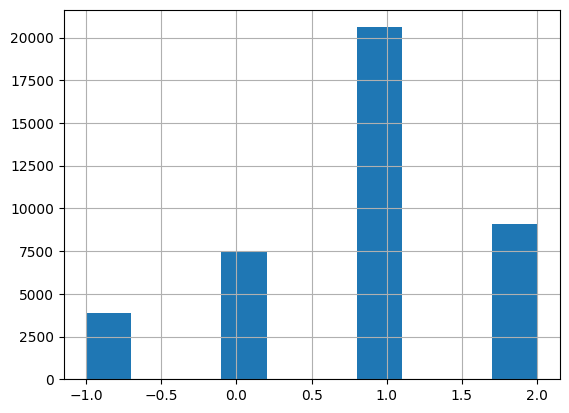

In [4]:
df['sentiment'].hist()

In [5]:
df['sentiment_category'] = np.where(df['sentiment'] == 0, 'neutral',
                                    np.where(df['sentiment'] == 1, 'pro',
                                             np.where(df['sentiment'] == 2, 'news',
                                                      np.where(df['sentiment'] == -1, 'anti', None)
                                                     )
                                            )
                                   )
df.to_csv('preprocessed_twitter_sentiment_data.csv', index=False)

In [6]:
# Step 3: Keyword Analysis
positive_keywords = df[df['sentiment_category'] == 'Positive']['message'].str.split(expand=True).stack().value_counts().head(10)
negative_keywords = df[df['sentiment_category'] == 'Negative']['message'].str.split(expand=True).stack().value_counts().head(10)
neutral_keywords = df[df['sentiment_category'] == 'Neutral']['message'].str.split(expand=True).stack().value_counts().head(10)


In [7]:
G = nx.Graph()
for index, row in df.iterrows():
    G.add_node(row['username'], sentiment=row['sentiment'], sentiment_category=row['sentiment_category'])
    if index > 0:
        G.add_edge(row['username'], df.at[index - 1, 'username'])


# %%
# Visualization of the Network Graph
plt.figure(figsize=(12, 8))

# Customize layout for better cluster separation
pos = nx.spring_layout(G, k=0.3, iterations=50)

# Define color mapping for sentiment categories
color_map = {'neutral': 'blue', 'pro': 'green', 'news': 'orange', 'anti': 'red'}

# Draw nodes with colors based on sentiment category
node_colors = [color_map[G.nodes[node]['sentiment_category']] for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=30, node_color=node_colors)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.4)

# Add legend for color mapping
for sentiment, color in color_map.items():
    plt.scatter([], [], c=color, label=sentiment)

plt.title('Network Graph with Sentiment Coloring')
plt.legend()
plt.show()

KeyboardInterrupt: 

<Figure size 1200x800 with 0 Axes>

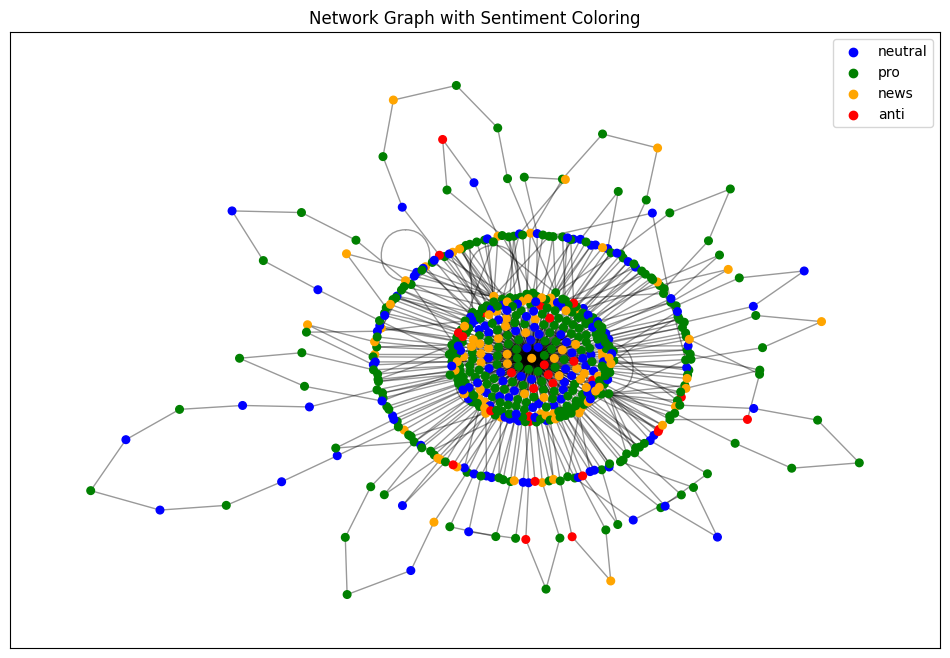

In [ ]:


# %%
G = nx.Graph()
for index, row in df.iterrows():
    G.add_node(row['username'], sentiment=row['sentiment'], sentiment_category=row['sentiment_category'])
    if index > 0:
        G.add_edge(row['username'], df.at[index - 1, 'username'])


# %%
# Visualization of the Network Graph
plt.figure(figsize=(12, 8))

# Kamada-Kawai layout for better cluster separation
pos = nx.kamada_kawai_layout(G)

# Define color mapping for sentiment categories
color_map = {'neutral': 'blue', 'pro': 'green', 'news': 'orange', 'anti': 'red'}

# Draw nodes with colors based on sentiment category
node_colors = [color_map[G.nodes[node]['sentiment_category']] for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=30, node_color=node_colors)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.4)

# Add legend for color mapping
for sentiment, color in color_map.items():
    plt.scatter([], [], c=color, label=sentiment)

plt.title('Network Graph with Sentiment Coloring')
plt.legend()

plt.show()


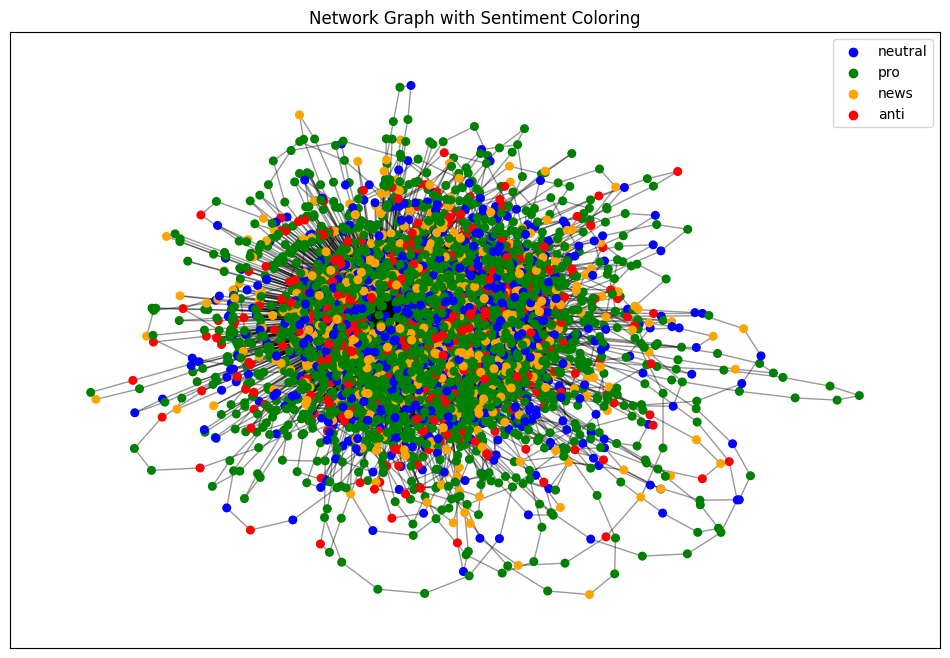

In [ ]:


# %%
G = nx.Graph()
for index, row in df.iterrows():
    G.add_node(row['username'], sentiment=row['sentiment'], sentiment_category=row['sentiment_category'])
    if index > 0:
        G.add_edge(row['username'], df.at[index - 1, 'username'])


# %%
# Visualization of the Network Graph
plt.figure(figsize=(12, 8))

# Fruchterman-Reingold layout for better cluster separation
pos = nx.fruchterman_reingold_layout(G)

# Define color mapping for sentiment categories
color_map = {'neutral': 'blue', 'pro': 'green', 'news': 'orange', 'anti': 'red'}

# Draw nodes with colors based on sentiment category
node_colors = [color_map[G.nodes[node]['sentiment_category']] for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=30, node_color=node_colors)

# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.4)

# Add legend for color mapping
for sentiment, color in color_map.items():
    plt.scatter([], [], c=color, label=sentiment)

plt.title('Network Graph with Sentiment Coloring')
plt.legend()

plt.show()


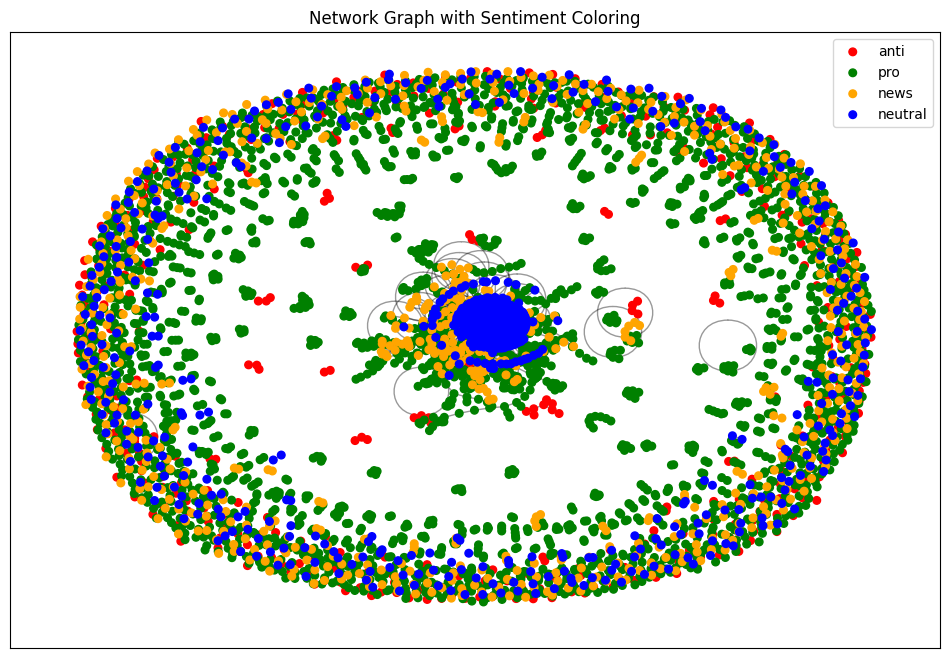

In [ ]:

# %%
G = nx.Graph()
for index, row in df.iterrows():
    G.add_node(row['username'], sentiment=row['sentiment'], sentiment_category=row['sentiment_category'])
    if index > 0:
        prev_username = df.at[index - 1, 'username']
        if prev_username in G.nodes and row['username'] in G.nodes:  # Check if both nodes exist in the graph
            G.add_edge(row['username'], prev_username)


# %%
# Visualization of the Network Graph
plt.figure(figsize=(12, 8))

# Define color mapping for sentiment categories
color_map = {'neutral': 'blue', 'pro': 'green', 'news': 'orange', 'anti': 'red'}

# Split nodes based on color categories
color_groups = {}
for node, data in G.nodes(data=True):
    color = data['sentiment_category']
    if color not in color_groups:
        color_groups[color] = []
    color_groups[color].append(node)

# Compute layout for each color group
layouts = {}
for color, nodes in color_groups.items():
    subgraph = G.subgraph(nodes)
    layouts[color] = nx.spring_layout(subgraph)

# Draw nodes and edges for each color group
for color, nodes in color_groups.items():
    node_colors = [color_map[color]] * len(nodes)
    pos = layouts[color]
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_size=30, node_color=node_colors, label=color)
    edges = [(u, v) for u, v in G.edges() if u in nodes and v in nodes]  # Filter edges for the current color group
    nx.draw_networkx_edges(G, pos, edgelist=edges, alpha=0.4)

plt.title('Network Graph with Sentiment Coloring')
plt.legend()
plt.show()

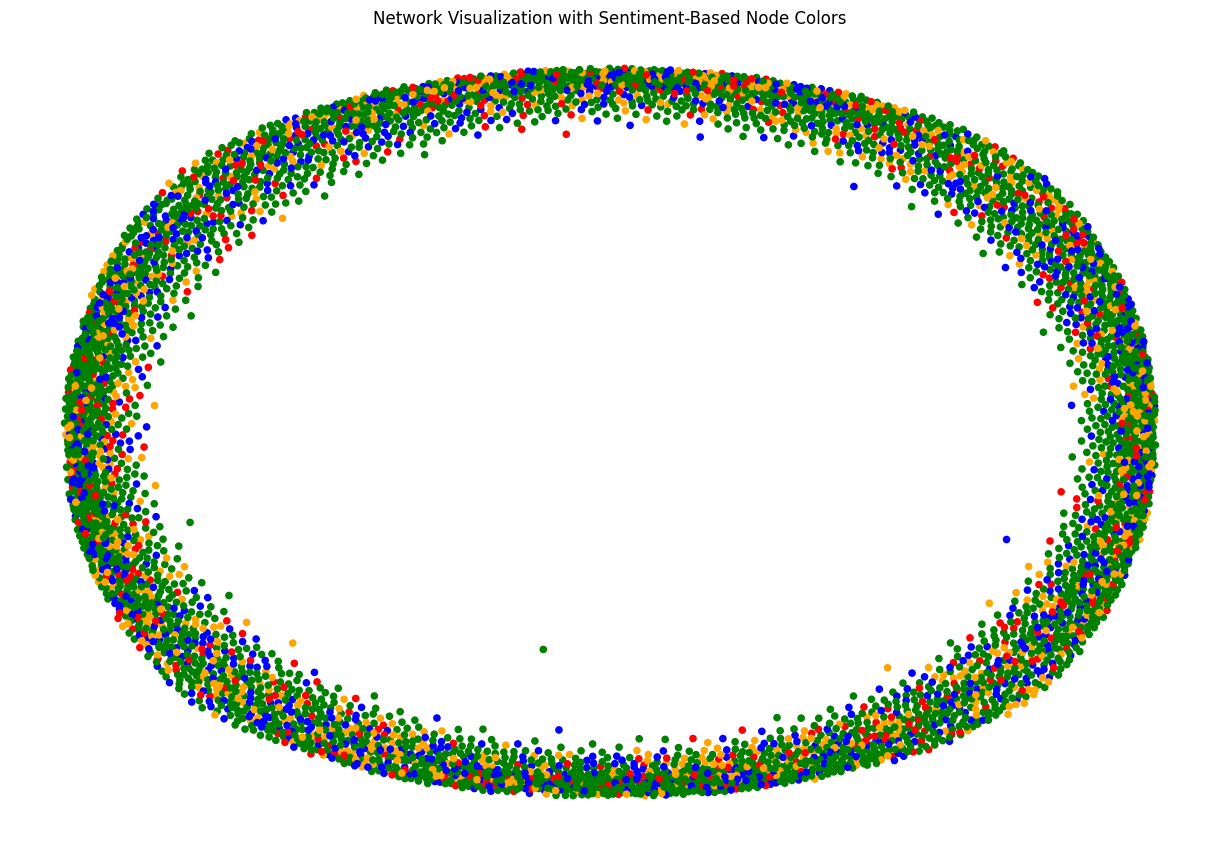

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming df is a pandas DataFrame with columns 'username' and 'sentiment'

# Calculate average sentiment for each user
user_sentiments = df.groupby('username')['sentiment'].mean()

# Round average sentiment to the nearest sentiment category (-1, 0, 1, 2)
rounded_sentiments = user_sentiments.round().astype(int)
# Add sentiment category to the DataFrame as category data type
df['sentiment_category'] = rounded_sentiments

# Define sentiment categories
sentiment_categories = [-1, 0, 1, 2]

# Create a directed graph
G = nx.DiGraph()
color_map = {0: 'blue', 1: 'green', 2: 'orange', -1: 'red'}
# Add nodes for each user
for user in rounded_sentiments.index:
    G.add_node(user)
# color the nodes based on sentiment
node_colors = [color_map[rounded_sentiments[node]] for node in G.nodes]

# Draw the graph
pos = nx.spring_layout(G, k=0.3)  # Adjust the parameter 'k' to increase spacing between nodes
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=20, font_size=10)
plt.title('Network Visualization with Sentiment-Based Node Colors')
plt.show()

In [ ]:
# Print out the nodes and their attributes for debugging
print("Nodes in the graph:")
for node, data in G.nodes(data=True):
    print(node, data)


Nodes in the graph:
@ABCNews {}
@ANI_news {}
@AQUILOGY {}
@AUSpur {}
@AchmarBinSchibi, @anagama {}
@AngieNBC6 {}
@AstroKatie {}
@Baileytruett_yo, @Tomleewalker {}
@BernieSanders, @POTUS {}
@CC_Yale {}
@CNN {}
@Care2 {}
@CaseyNeistat {}
@CastanetNews {}
@CertainSm1 {}
@ClimateHome {}
@ClimateReality {}
@ConnorDukeSmith {}
@DemocracyNow {}
@DrJillStein {}
@EnvDefenseFund {}
@FAOKnowledge {}
@FeyNudibranch {}
@Firegal_01 {}
@FlitterOnFraud, @Reuters {}
@FoxNews {}
@FoxNews, @POTUS {}
@GE_France, @GE_Europe {}
@GiFlyBike {}
@Grant_Hall3 {}
@HuffPostPol {}
@HuffingtonPost {}
@IEA, @IEABirol {}
@IvanTheK {}
@Jackthelad1947 {}
@JayKraft {}
@JenniferGrayCNN, @hm5131_massey {}
@Jesusramir32Jr {}
@JohnAvlon, @thedailybeast {}
@JohnFromCranber, @ByronYork, @MZHemingway, @FDRLST {}
@Juniper40, @kburton40, @SusanSarandon {}
@Karoli, @morgfair, @OsborneInk, @dailykos {}
@LeoDiCaprio {}
@LeoDiCaprio, @NatGeoChannel {}
@Lezleyrenee {}
@Livermore_Lab {}
@MattDamonOnline {}
@MikeBloomberg, @LeoDiCaprio 

In [ ]:

# Additional Network Metrics
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
